### How to import mutCaller data into a Seurat object

In [1]:
  library(mutCallR)
  library(Seurat)
  library(stringr)

Attaching SeuratObject



#### Load a seurat object

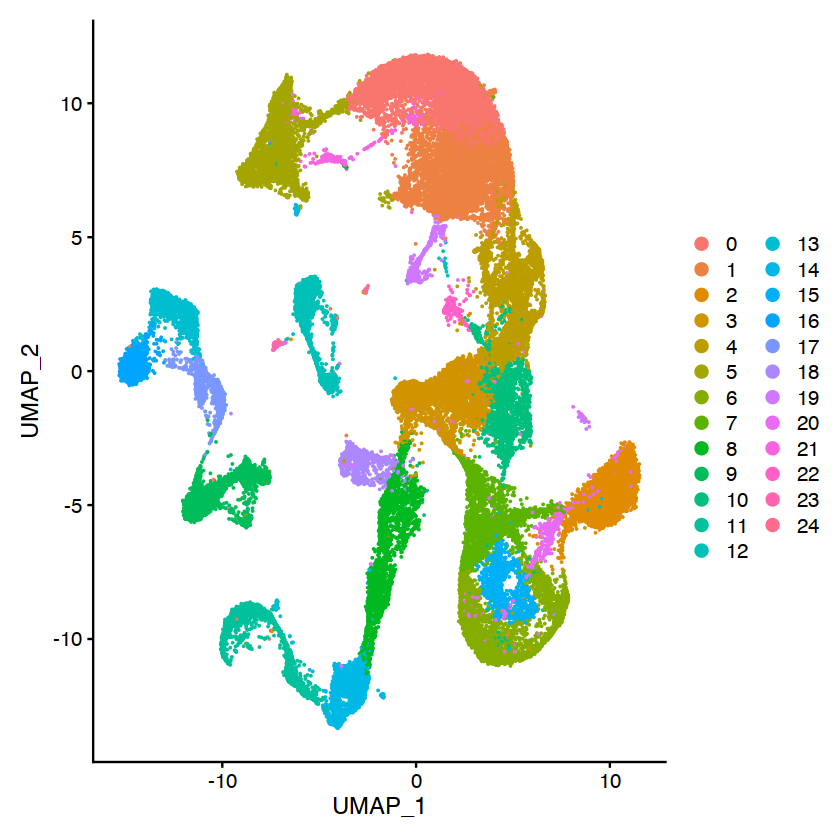

In [2]:
ROOT_DIR<-"some/location"
stem<-"folder"
seu<-readRDS(file.path(ROOT_DIR, stem, "file.RDS"))
DimPlot(seu)

#### Get cell barcode prefixes

In [3]:
prefixes<-names(table(str_sub(Cells(seu), end=-19)))[-c(3,4)]
prefixes

[1] "AML_703_34_"  "AML_703_BM_"  "JMML_701_34_" "JMML_701_BM_" "JMML_702_34_"
[6] "JMML_702_BM_"

#### Point to counts files


In [17]:
count_files<-list.files("countsfileslocation", full.names = T)
count_files

[1] "AML_703_34_SNP_Lib_S12.txt.gz"  "AML_703_BM_SNP_Lib_S11.txt.gz" 
[3] "JMML_701_34_SNP_Lib_S8.txt.gz"  "JMML_701_BM_SNP_Lib_S7.txt.gz" 
[5] "JMML_702_34_SNP_Lib_S10.txt.gz" "JMML_702_BM_SNP_Lib_S9.txt.gz"

#### Take a look at one of the counts files to get variant names

In [7]:
glimpse_countsfile(count_files[1])

Rows: 154259 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: " "
chr (5): cb, umi, seq, name, call
dbl (2): loc, count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



  IDH1_132G>A     MYBindel1     MYBindel2 PTPN11_227A>G   TP53_248C>T 
        27475         16769         16546         68955         24514 

#### Read in variants for PTPN11_227A>G and plot

Note that the ">" character is not allowed in the metadata of a seurat object, hence the warning.  As such plotting will need to be done substituting the "." character for ">"

'-1' suffix found at the end of all cell barcodes; temporarily removing these for matching

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is PTPN11_227A.G; see ?make.names for more details on syntax validity”


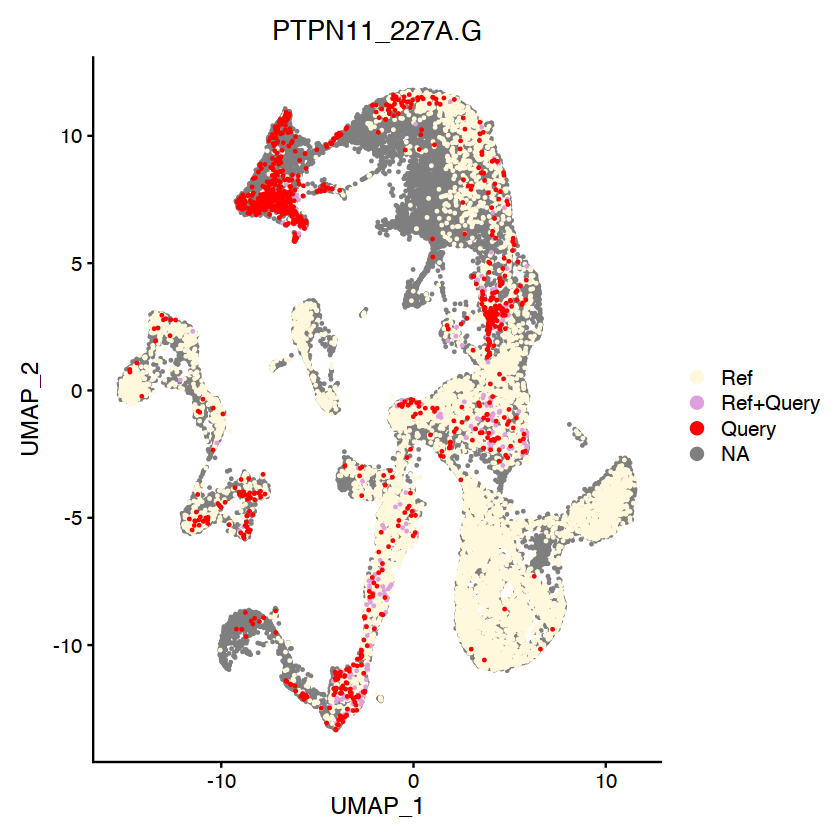

In [8]:
seu<-read_mutcaller(seu, read_thresh = 100, count_files = count_files, prefixes = prefixes, name="PTPN11_227A>G", cores = 8)
DimPlot(seu,  group.by = "PTPN11_227A.G", order = T, pt.size = 0.3, cols = c(  "cornsilk", "plum","red"))

'-1' suffix found at the end of all cell barcodes; temporarily removing these for matching



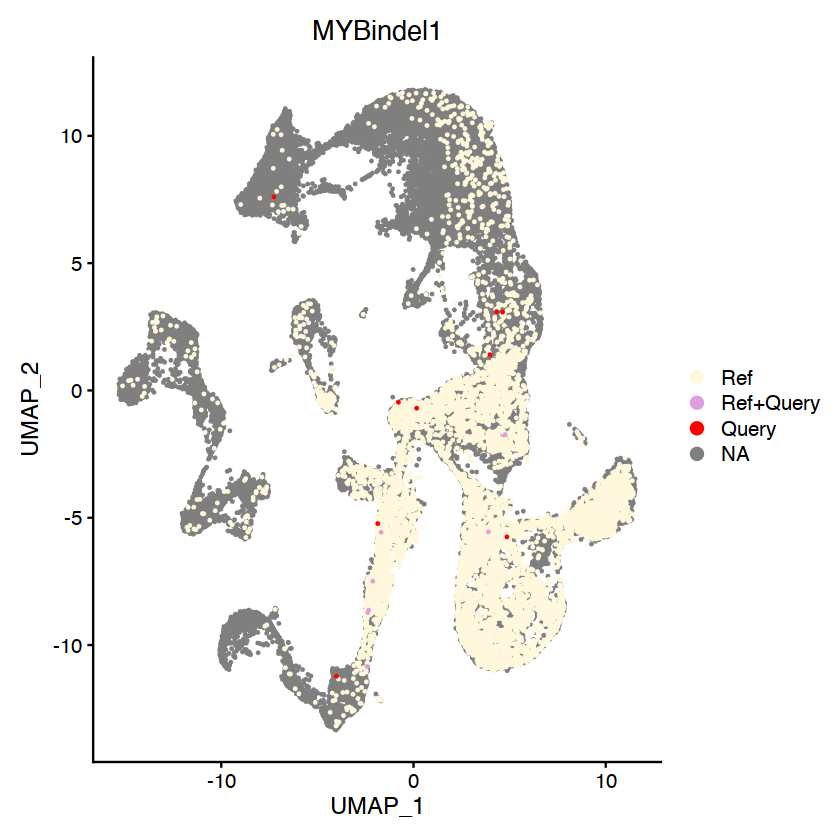

In [9]:
seu<-read_mutcaller(seu, read_thresh = 1, count_files = count_files, prefixes = prefixes, name="MYBindel1", cores = 8)
#debug(read_mutcaller)
DimPlot(seu,  group.by = "MYBindel1", order = T, pt.size = 0.3, cols = c(  "cornsilk", "plum","red"))

'-1' suffix found at the end of all cell barcodes; temporarily removing these for matching



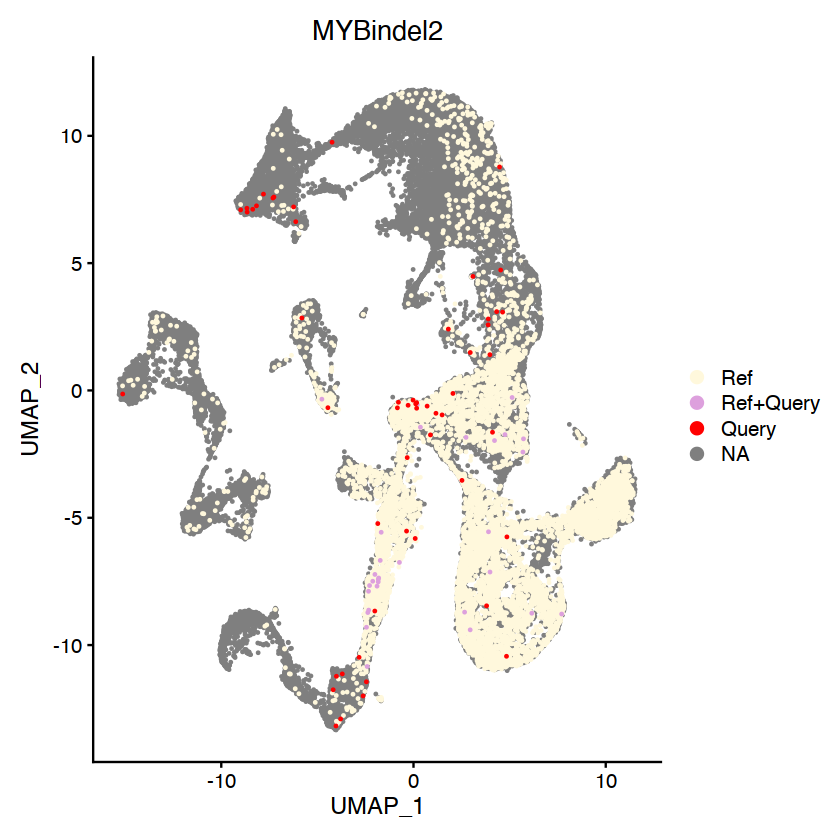

In [10]:
seu<-read_mutcaller(seu, read_thresh = 1, count_files = count_files, prefixes = prefixes, name="MYBindel2", cores = 8)
#debug(read_mutcaller)
DimPlot(seu,  group.by = "MYBindel2", order = T, pt.size = 0.3, cols = c(  "cornsilk", "plum","red"))

'-1' suffix found at the end of all cell barcodes; temporarily removing these for matching

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is IDH1_132G.A; see ?make.names for more details on syntax validity”


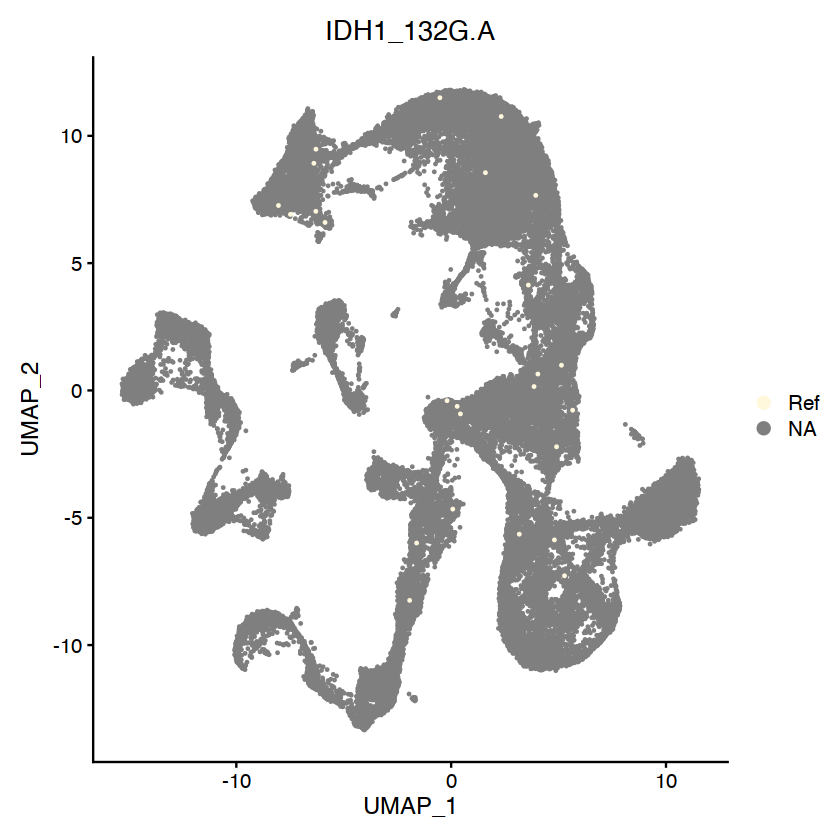

In [11]:
seu<-read_mutcaller(seu, read_thresh = 1, count_files = count_files, prefixes = prefixes, name="IDH1_132G>A", cores = 8)
#debug(read_mutcaller)
DimPlot(seu,  group.by = "IDH1_132G.A", order = T, pt.size = 0.3, cols = c(  "cornsilk", "plum","red"))

'-1' suffix found at the end of all cell barcodes; temporarily removing these for matching

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is TP53_248C.T; see ?make.names for more details on syntax validity”


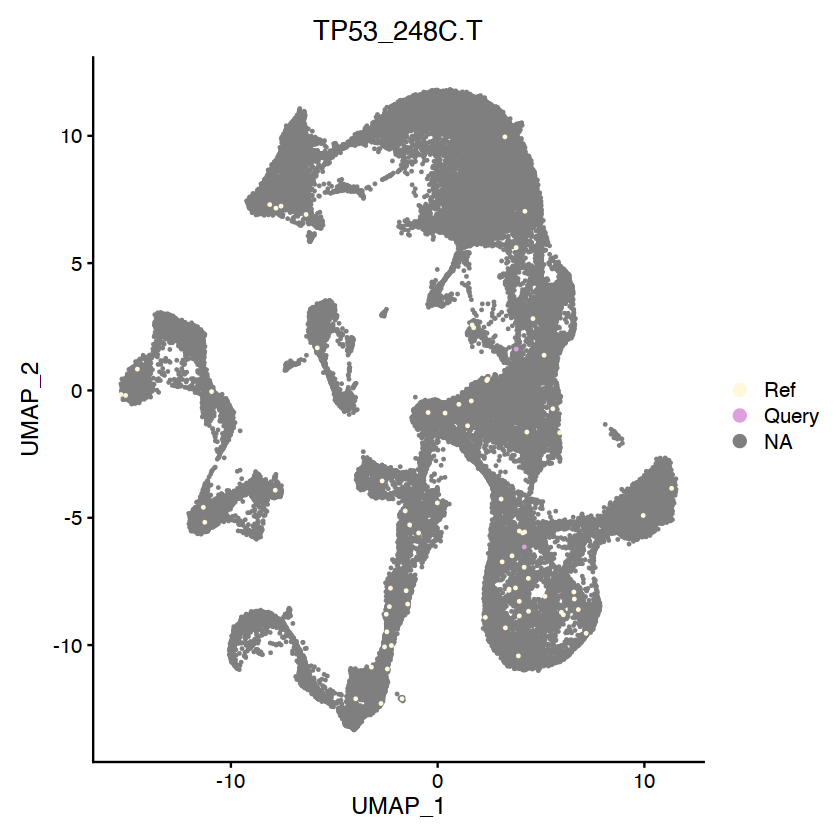

In [12]:
seu<-read_mutcaller(seu, read_thresh = 1, count_files = count_files, prefixes = prefixes, name="TP53_248C>T", cores = 8)
#debug(read_mutcaller)
DimPlot(seu,  group.by = "TP53_248C.T", order = T, pt.size = 0.3, cols = c(  "cornsilk", "plum","red"))

### For monocle3 objects

In [13]:
library(monocle3)
library(ggplot2)
cds<-viewmastR::seurat_to_monocle3(seu)

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading requir

No trajectory to plot. Has learn_graph() been called yet?



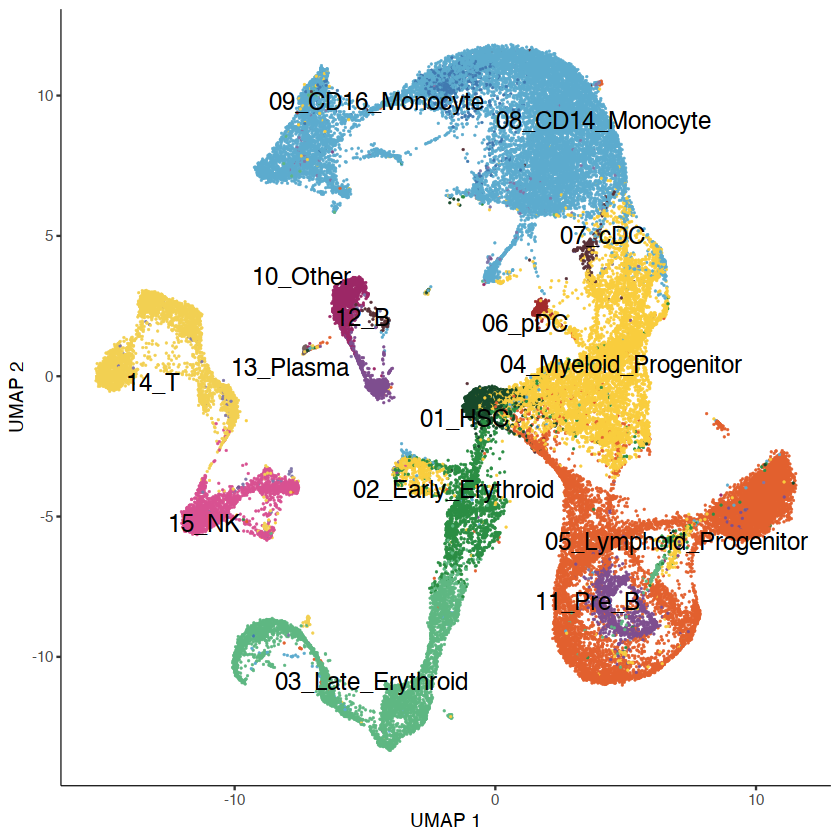

In [14]:
plot_cells(cds, color_cells_by = "celltype", group_label_size = 5)+scale_color_manual(values=viewmastR::sfc(15))

No trajectory to plot. Has learn_graph() been called yet?



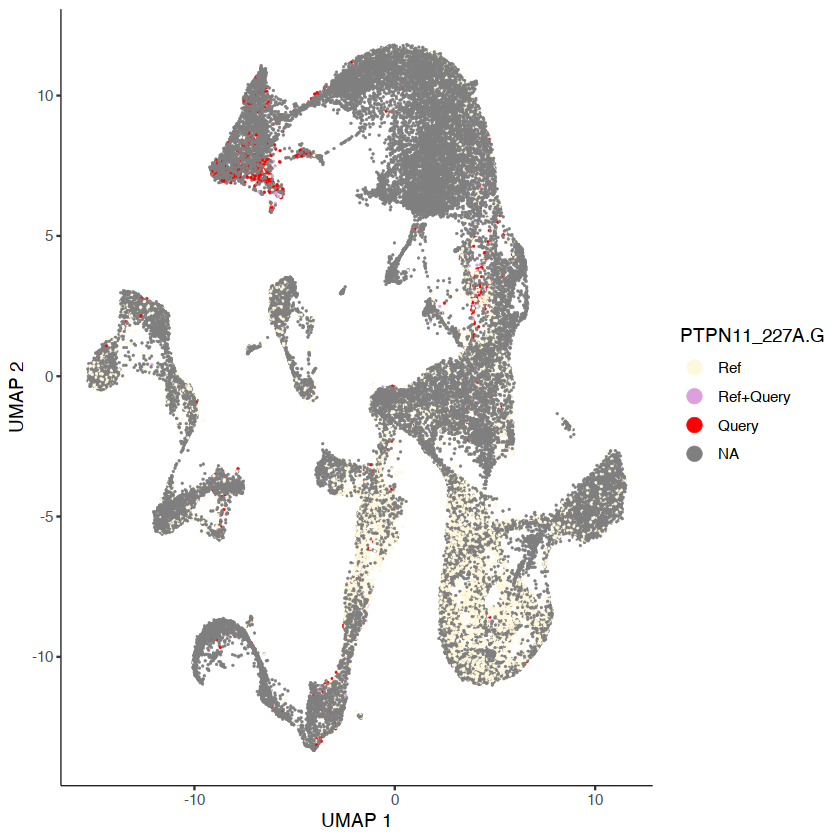

In [16]:
cds<-read_mutcaller(cds, read_thresh = 100, count_files = count_files, prefixes = prefixes, name="PTPN11_227A>G", cores = 8)
plot_cells(cds, color_cells_by =  "PTPN11_227A.G", label_cell_groups = F)+scale_color_manual(values  = c(  "cornsilk", "plum","red"))